# Digital Image Enhancement: Overview and Importance in Medical Imaging

**Image Enhancement Method:**
Image enhancement refers to the process of adjusting images to make them more suitable for specific applications. The goal is to enhance certain features of the image, making it more interpretable or visually pleasing. This process can involve increasing the contrast, sharpening edges, reducing noise, or adjusting brightness levels.

**Why Image Enhancement is Crucial in Processing Medical Images:**
In medical imaging, clarity and accuracy are paramount. Image enhancement helps in:
Highlighting Critical Details: Enhancing subtle structures in medical images can aid in accurate diagnosis.
Reducing Noise: Medical images often contain noise due to various factors, and enhancement techniques can reduce this noise.
Improving Contrast: Enhancing contrast helps in better differentiation between various tissues, organs, and abnormalities.
Assisting in Automated Diagnosis: Enhanced images improve the performance of algorithms used in computer-aided diagnosis (CAD) systems.

# **Classification of Image Enhancement Methods**
Image enhancement methods can be broadly classified into:

**Spatial Domain Methods:**

-Operate directly on pixels.

-Examples: Histogram Equalization (HE), Gamma Correction.

**Frequency Domain Methods:**

-Operate on the Fourier transform of an image.

-Examples: Filtering techniques like Gaussian filters.

**Transform Domain Methods:**

-Operate on various transforms like Wavelet or DCT.

-Examples: Wavelet-based enhancement.

# **Image Enhancement Methods with Python Code**
Here’s how you can implement some of these enhancement techniques:


##Color Enhancement based method


**1.Gamma Correction:**
Adjusts the brightness of an image by transforming pixel values using a gamma value.

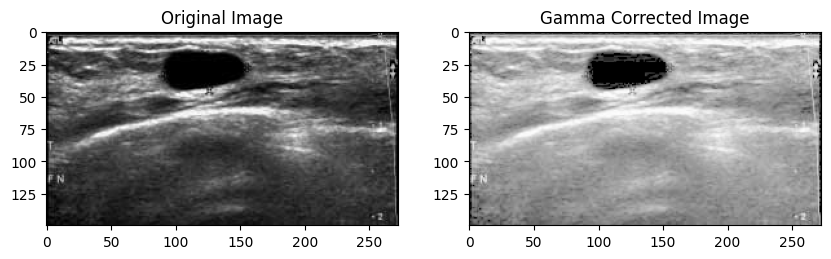

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(image, gamma):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Load image
image = cv2.imread('/content/bus.jpg')
gamma_corrected = gamma_correction(image, gamma=3.0)

# Display the result
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Gamma Corrected Image')
plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))
plt.show()

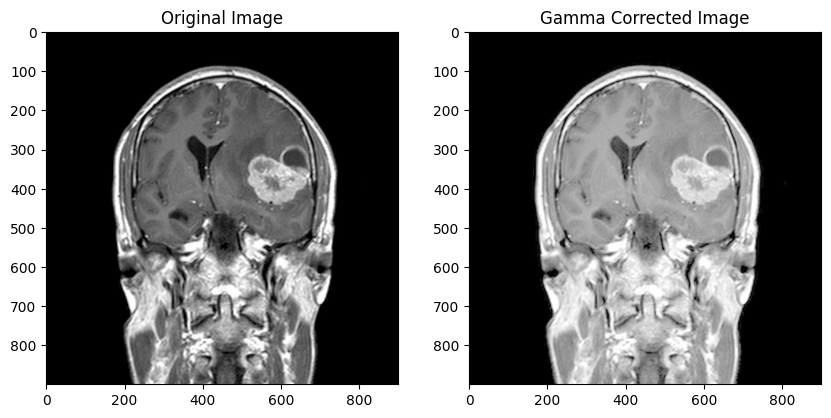

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Load image
image = cv2.imread('/content/Copy of brain.jpg')
gamma_corrected = gamma_correction(image, gamma=2.0)

# Display the result
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Gamma Corrected Image')
plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))
plt.show()

##Histogram-Based Methods

**Contrast-limited Adaptive Histogram Equalization (CLAHE):**Enhances contrast in small regions of the image.



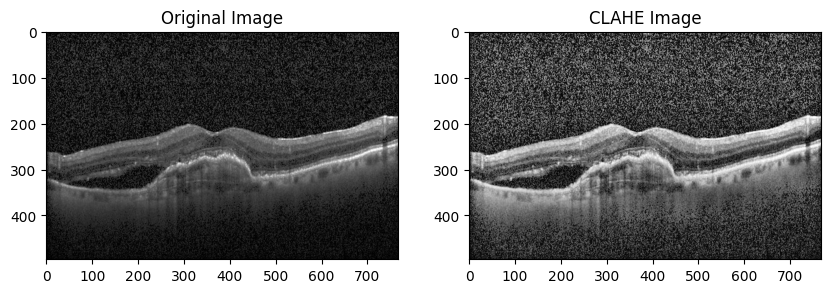

In [23]:
def clahe(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    if image is not None: # Check if image was loaded successfully
        if len(image.shape) == 2:
            return clahe.apply(image)
        elif len(image.shape) == 3:
            channels = cv2.split(image)
            clahe_channels = [clahe.apply(ch) for ch in channels]
            return cv2.merge(clahe_channels)
    else:
        return None # Handle the case where image is None

# Load image. Make sure 'image_path' is correct.
image_path = '/content/practice image.jpg'
clahe_image = clahe(image)

# Display the result
if clahe_image is not None: # Check if CLAHE was applied successfully
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title('CLAHE Image')
    plt.imshow(clahe_image, cmap='gray')
    plt.show()
else:
    print("Failed to load or apply CLAHE to the image. Check the file path.")

##Spatial Filtering


**Averaging Filter**: Smooths an image by replacing each pixel's value with the average of its neighboring pixels

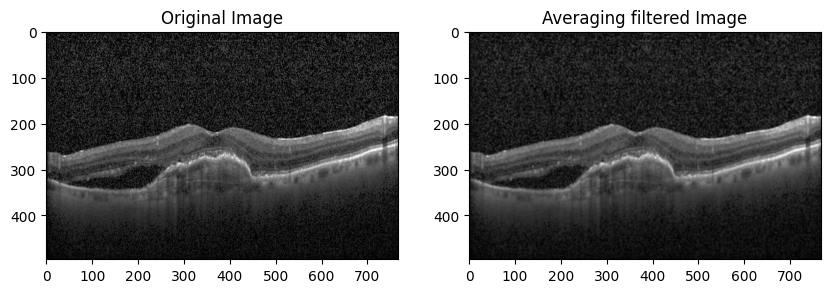

In [21]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

image = cv.imread('/content/practice image.jpg')

avg = cv.blur(image,(3,3))

# Display the result
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Averaging filtered Image')
plt.imshow(cv.cvtColor(avg, cv.COLOR_BGR2RGB))
plt.show()

##Frequency Domain Methods

**Fournier Filtering**: Reduces noise in images

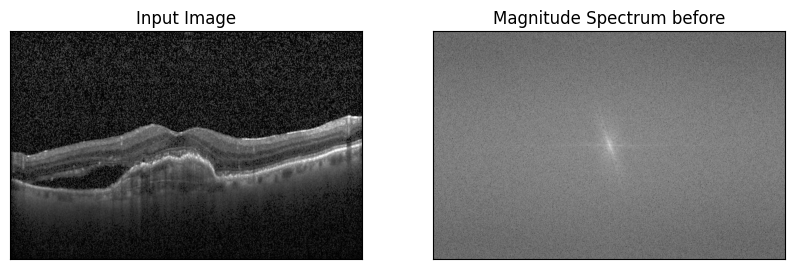

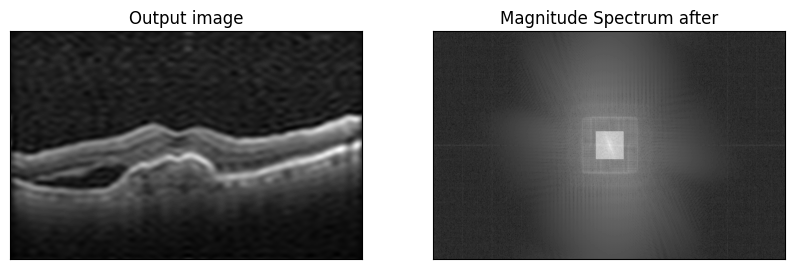

In [13]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('/content/practice image.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum before'), plt.xticks([]), plt.yticks([])
plt.show()
rows, cols = img.shape
crow, ccol = rows//2, cols//2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

# Plot the magnitude spectrum of the filtered image
dft_back = cv.dft(np.float32(img_back), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift_back = np.fft.fftshift(dft_back)
magnitude_spectrum_back = 20 * np.log(cv.magnitude(dft_shift_back[:,:,0], dft_shift_back[:,:,1]))

plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Output image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum_back, cmap = 'gray')
plt.title('Magnitude Spectrum after'), plt.xticks([]), plt.yticks([])
plt.show()